In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os


In [14]:

# Define dataset paths
train_dir = "A,B,CNNS_with_Tim/veggie_heap_training"
test_dir = "A,B,CNNS_with_Tim/veggie_heap_testing"

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 7872 images belonging to 12 classes.
Found 1963 images belonging to 12 classes.


In [15]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

c:\Users\agraw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\agraw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 56s 220ms/step - accuracy: 0.3054 - loss: 2.0141 - val_accuracy: 0.7132 - val_loss: 0.8212
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 191ms/step - accuracy: 0.6512 - loss: 1.0107 - val_accuracy: 0.7825 - val_loss: 0.6303
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 191ms/step - accuracy: 0.7337 - loss: 0.7724 - val_accuracy: 0.8161 - val_loss: 0.5044
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 192ms/step - accuracy: 0.7711 - loss: 0.6764 - val_accuracy: 0.8930 - val_loss: 0.3778
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 192ms/step - accuracy: 0.7996 - loss: 0.5854 - val_accuracy: 0.8905 - val_loss: 0.3194
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 192ms/step - accuracy: 0.8262 - loss: 0.5246 - val_accuracy: 0.8701 - val_loss: 0.3588
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 47s 190ms/step - accuracy: 0.8245 - loss: 0.5184 - val_accuracy: 0.8920 - val_loss: 0.3568
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 50s 202ms/step - accuracy: 0.8352 - loss: 0

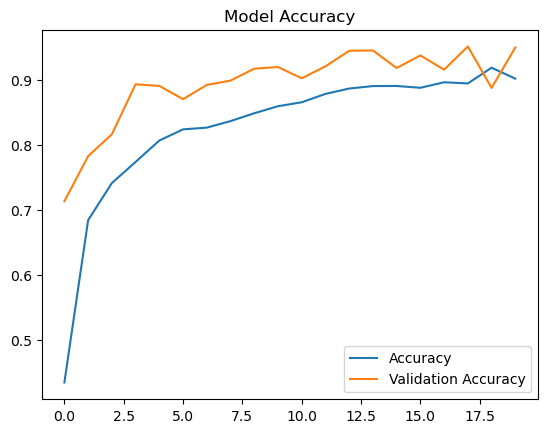

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for correct label mapping
)


Found 2424 images belonging to 12 classes.


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.7427 - loss: 2.2055
Test Accuracy: 65.72%
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step


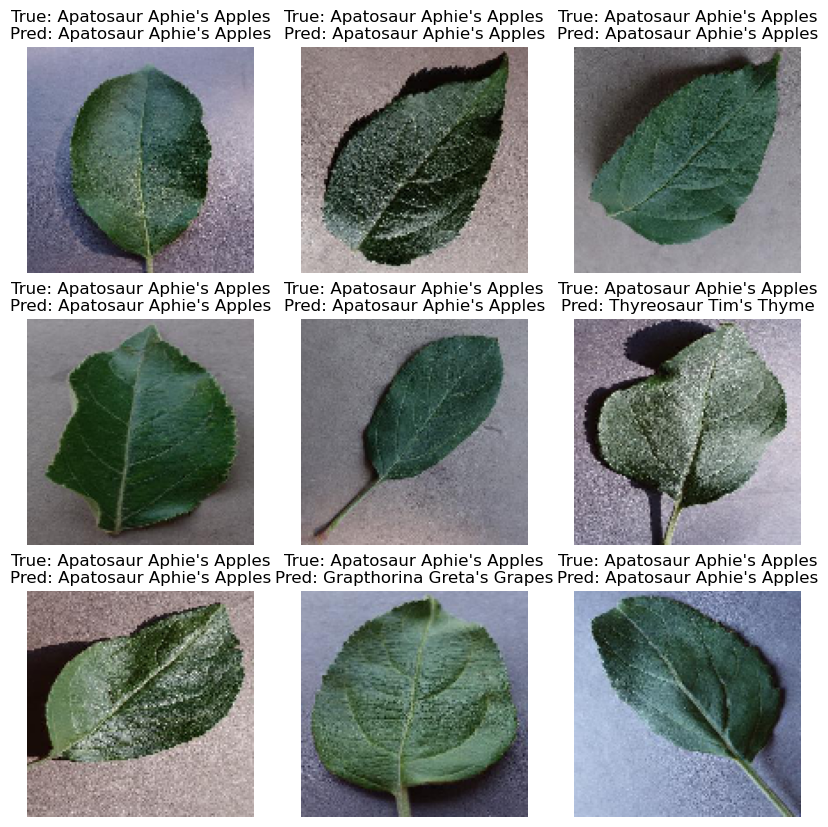

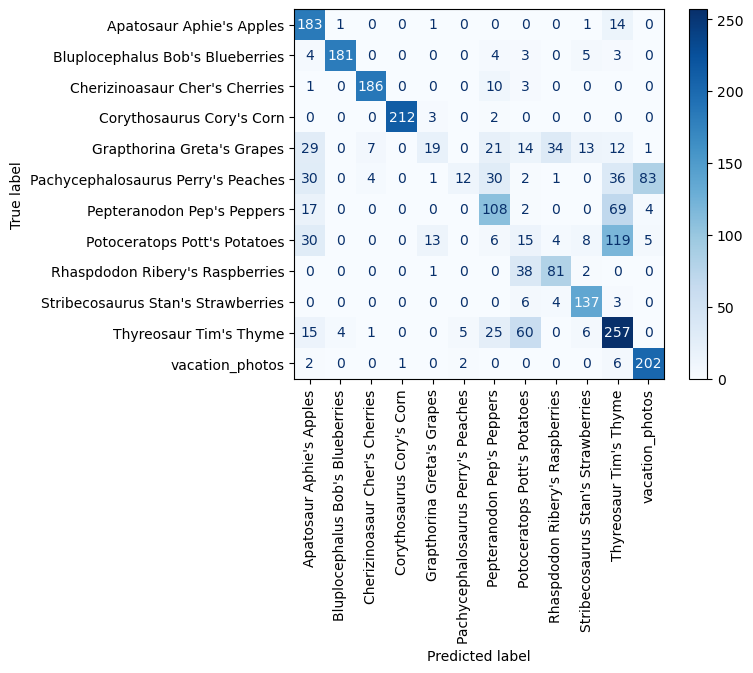

In [18]:

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Plot a few images with predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for img, ax, true_label, pred_label in zip(test_generator[0][0], axes, true_classes, predicted_classes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")

plt.show()

# Confusion Matrix for better insights
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.show()
